<h1>From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.</h1>

In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()                                                      # Display first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# understanding the data
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#checking for null values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# DATA VISUALIZATION

<Figure size 1440x720 with 0 Axes>

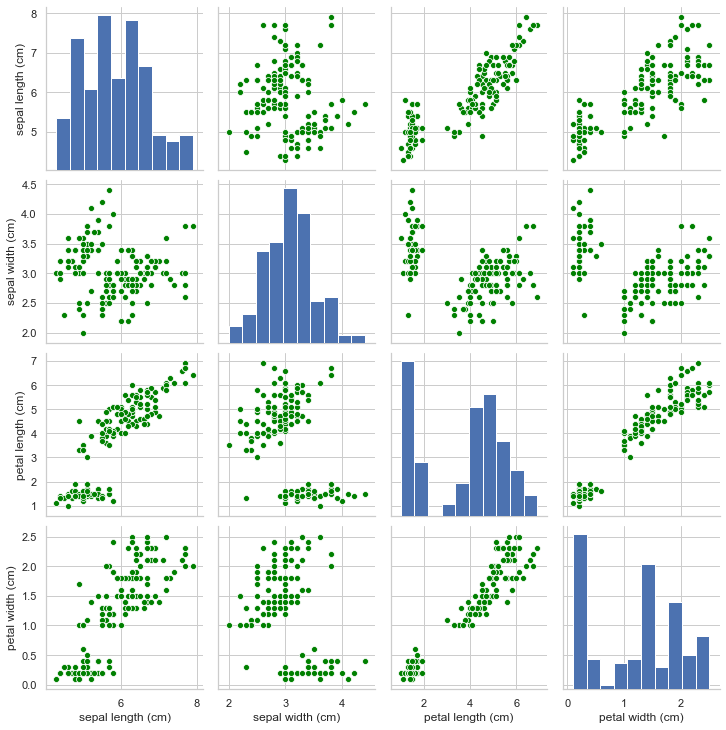

In [5]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (20, 10))
sns.pairplot(iris_df, plot_kws = {'color' : 'green'});

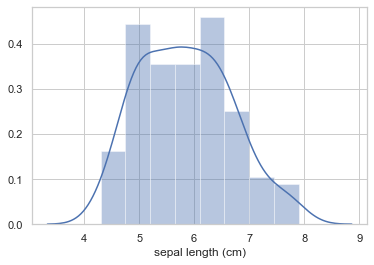

In [6]:
# making the distplot
sns.distplot(iris_df["sepal length (cm)"])

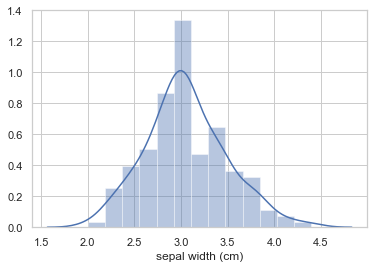

In [7]:
sns.distplot(iris_df["sepal width (cm)"])

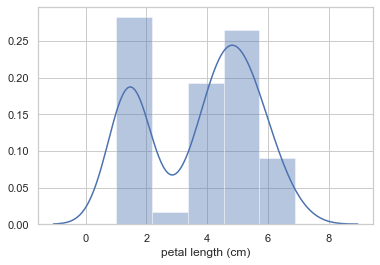

In [8]:
sns.distplot(iris_df["petal length (cm)"])

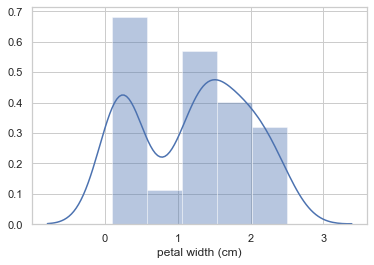

In [9]:
sns.distplot(iris_df["petal width (cm)"])

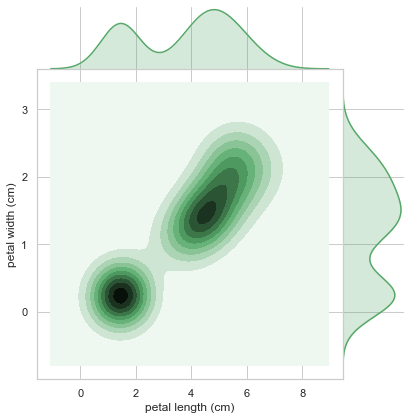

In [10]:
# making the KDE plot
sns.jointplot(data = iris_df , x = "petal length (cm)" , y = "petal width (cm)", kind="kde", space=0, color="g" )

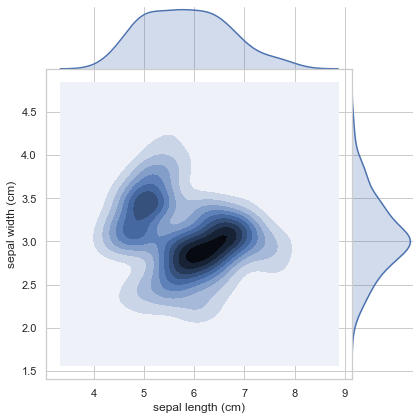

In [11]:
# making the KDE plot
sns.jointplot(data = iris_df , x = "sepal length (cm)" , y = "sepal width (cm)", kind="kde", space=0, color="b" )

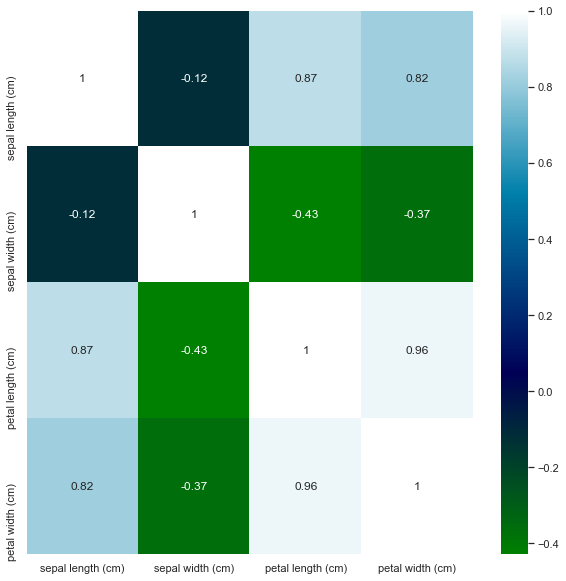

In [12]:
#HEATMAP, for correlation plot
sns.set()
plt.figure(figsize = (10, 10))
sns.heatmap(iris_df.corr(), annot = True, cmap = 'ocean');

# How do you find the optimum number of clusters for K Means? How does one determine the value of K?

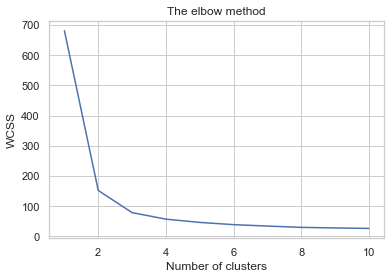

In [13]:
# Finding the optimum number of clusters for k-means classification
sns.set(style = 'whitegrid')
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [14]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

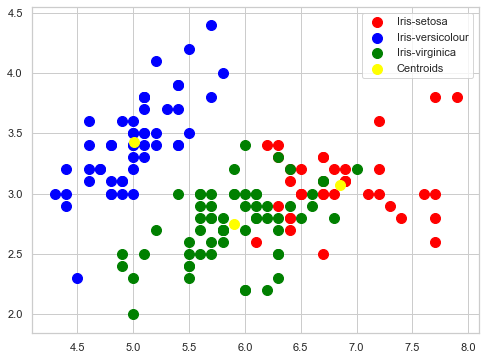

In [15]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(8,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# This concludes the K-Means Workshop.